In [1]:
# Configuring Spark
import findspark
findspark.init()

In [2]:
# Import required modules
from pyspark.sql import SparkSession
from pyspark.sql.functions import rand
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create a Spark Session
spark = SparkSession.builder \
    .appName("process") \
    .config("spark.driver.memory", "8g") \
    .config("spark.executor.memory", "8g") \
    .getOrCreate()



In [4]:
# Read CSV files
df1 = spark.read.csv("../../RawData/Preprocessed_data/Data90.csv", header=True, inferSchema=True)
df2 = spark.read.csv("../../RawData/Preprocessed_data/Data91.csv", header=True, inferSchema=True)
df3 = spark.read.csv("../../RawData/Preprocessed_data/Data92.csv", header=True, inferSchema=True)
df4 = spark.read.csv("../../RawData/Preprocessed_data/Data93.csv", header=True, inferSchema=True)
df5 = spark.read.csv("../../RawData/Preprocessed_data/Data94.csv", header=True, inferSchema=True)
df6 = spark.read.csv("../../RawData/Preprocessed_data/Data95.csv", header=True, inferSchema=True)
df7 = spark.read.csv("../../RawData/Preprocessed_data/Data96.csv", header=True, inferSchema=True)
df8 = spark.read.csv("../../RawData/Preprocessed_data/Data97.csv", header=True, inferSchema=True)
df9 = spark.read.csv("../../RawData/Preprocessed_data/Data98.csv", header=True, inferSchema=True)
df10 = spark.read.csv("../../RawData/Preprocessed_data/Data99.csv", header=True, inferSchema=True)


In [5]:
# Concatenate the DataFrames vertically
merged_df = df1
for i in range(2, 11):
    merged_df = merged_df.union(eval(f"df{i}"))

# Show the merged DataFrame
merged_df.show()

+------------------+-------------+---------+--------------+-------------+--------------+--------------+-------------------+----------------+-------------------+------------------+-------------------+------------------+-------------+------------+------------------+---------------------+----------------+----------------+------------------+-----------------------+----------------+--------------------------------+-----------------+---------------------+----------------+-------------------+--------------------+-----------------------+------------------------+--------------------------------+---------------------------------+------------------------------+-------------------------------+------------------------+-----------------------+----------------------+----------------------+----------------------------+-----------------------------+-------------------------+----------------------+--------------------------+--------------------------+------------------------------+----------------------

In [6]:
# we will drop the null values
merged_df = merged_df.dropna()

In [7]:
merged_df.head(5)

[Row(F2_replaced_family=1, F2_households='3', F2_gender=2, F2_month_birth=4.0, F2_year_birth=76.0, F2_age_at_time=13.0, F2_nationality='1', F2_residence_status='1', F2_time_in_place=1, F2_education_status=1, F2_literacy_status=1, F2_education_degree=2, F2_marriage_status='4', F3_wsw_salary=2, F3_wsw_money='2', F3_wsw_work_family='2', F3_wsw_product_family='2', F3_wsw_intership='2', F3_wsw_skip_work='2', F3_wsw_why_skipped='NFC', F3_wsw_have_another_job='NFC', F3_cej_job_title='NFC', F3_cej_workplace_characteristics='NFC', F3_cej_job_status='NFC', F3_cej_workers_number='NFC', F3_cej_insurance='NFC', F3_cej_years_in_job=-1.0, F3_cej_months_in_job=-1.0, F3_cej_years_whole_work=-1.0, F3_cej_months_whole_work=-1.0, F3_hwj_season_prime_days_in_week=-1.0, F3_hwj_season_prime_hours_in_week=-1.0, F3_hwj_season_all_days_in_week=-1.0, F3_hwj_season_all_hours_in_week=-1.0, F3_hwj_why_hours_in_week='NFC', F3_hwj_sum_hours_worked=-1.0, F3_hwj_why_less_worked='NFC', F3_hwj_why_more_worked='NFC', F3_d

In [8]:
# Shuffle the rows randomly
merged_df = merged_df.orderBy(rand())

In [9]:
merged_df.printSchema()

root
 |-- F2_replaced_family: integer (nullable = true)
 |-- F2_households: string (nullable = true)
 |-- F2_gender: integer (nullable = true)
 |-- F2_month_birth: double (nullable = true)
 |-- F2_year_birth: double (nullable = true)
 |-- F2_age_at_time: double (nullable = true)
 |-- F2_nationality: string (nullable = true)
 |-- F2_residence_status: string (nullable = true)
 |-- F2_time_in_place: integer (nullable = true)
 |-- F2_education_status: integer (nullable = true)
 |-- F2_literacy_status: integer (nullable = true)
 |-- F2_education_degree: integer (nullable = true)
 |-- F2_marriage_status: string (nullable = true)
 |-- F3_wsw_salary: integer (nullable = true)
 |-- F3_wsw_money: string (nullable = true)
 |-- F3_wsw_work_family: string (nullable = true)
 |-- F3_wsw_product_family: string (nullable = true)
 |-- F3_wsw_intership: string (nullable = true)
 |-- F3_wsw_skip_work: string (nullable = true)
 |-- F3_wsw_why_skipped: string (nullable = true)
 |-- F3_wsw_have_another_job: 

## Pie Chart

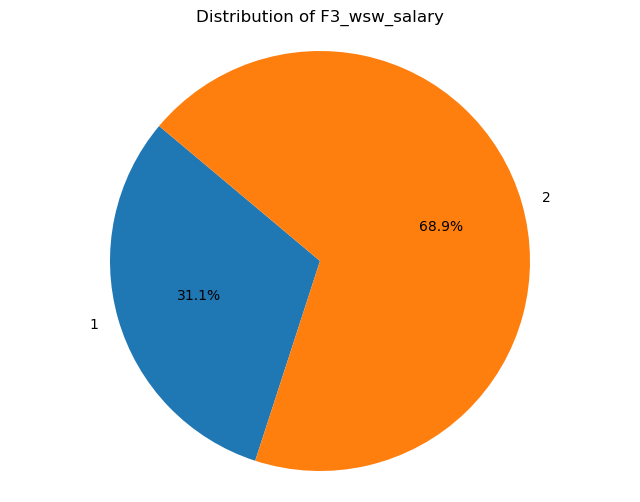

In [20]:
# Count occurrences of each unique value in the column
category = "F3_wsw_salary"
category_counts = merged_df.groupBy(category).count().collect()

# Prepare data for plotting
categories = [row[category] for row in category_counts]
counts = [row['count'] for row in category_counts]

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%' ,startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of ' + category)
plt.show()

## Bar Diagram

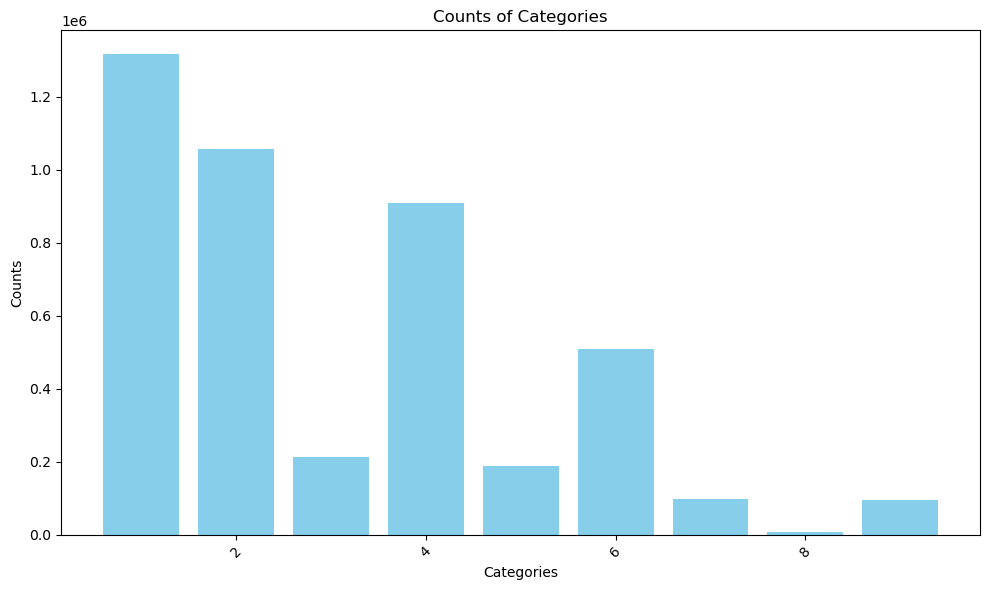

In [12]:
# Define the categorical column and excluded value
category = "F2_education_degree"
excluded_value = "NFC"

# Filter the DataFrame to exclude the specified value for the categorical column
filtered_df_categorical = merged_df[merged_df[category] != excluded_value]

# Count occurrences of each unique value in the column
category_counts = filtered_df_categorical.groupBy(category).count().collect()

# Prepare data for plotting
categories = [row[category] for row in category_counts]
counts = [row['count'] for row in category_counts]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Counts of Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

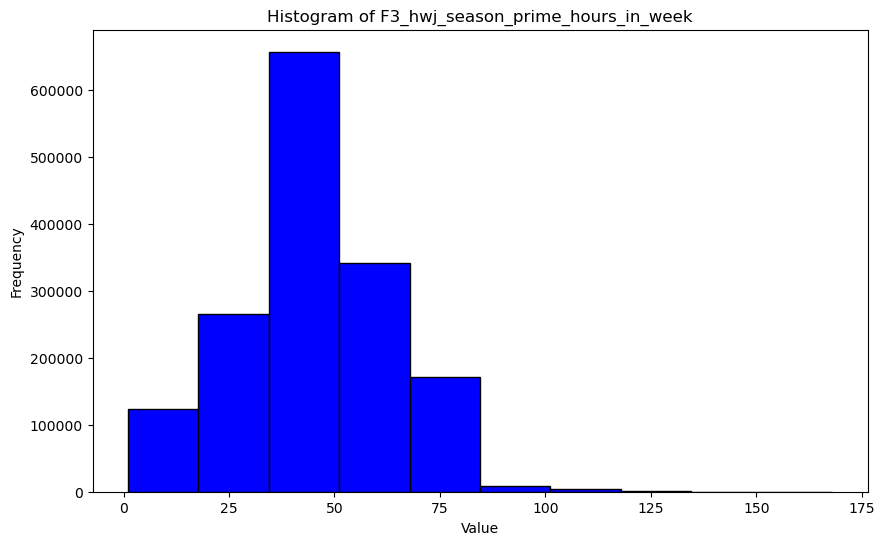

In [15]:
# Select the numerical column you want to analyze
numerical_column = "F3_hwj_season_prime_hours_in_week"

# ---
# Define the values you want to exclude
excluded_values = [-1]

# Filter the DataFrame to exclude the specified values
filtered_df = merged_df.filter(~merged_df[numerical_column].isin(excluded_values))
# ---


# Extract the numerical column data as a list
numerical_data = filtered_df.select(numerical_column).rdd.flatMap(lambda x: x).collect()

# Plotting the histogram using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(numerical_data, bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(numerical_column))

# Show plot
plt.show()

c:\Users\Arian\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


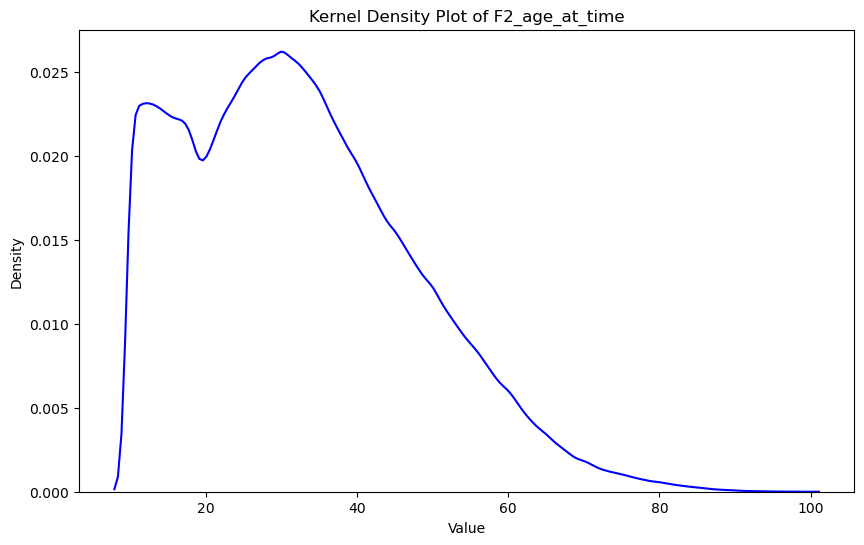

In [14]:
# Select the numerical column you want to analyze
numerical_column = "F2_age_at_time"

# ---
# Define the values you want to exclude
excluded_values = [-1]

# Filter the DataFrame to exclude the specified values
filtered_df = merged_df.filter(~merged_df[numerical_column].isin(excluded_values))
# ---

# Extract the numerical column data as a list
numerical_data = filtered_df.select(numerical_column).rdd.flatMap(lambda x: x).collect()

# Create a kernel density plot using Seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(numerical_data, color='blue')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Kernel Density Plot of {}'.format(numerical_column))

# Show plot
plt.show()

In [14]:
# Drop rows with null values in the 'category' column
#dfn = merged_df.dropna(subset=['F2_education_degree'])
# Get unique values in the column along with their counts
unique_values_with_counts = merged_df.groupBy('F2_education_degree').count().collect()

# Print unique values and their counts
print("Unique values in the column with counts:")
for row in unique_values_with_counts:
    print(f"{row['F2_education_degree']}: {row['count']}")


Unique values in the column with counts:
1: 1316253
6: 508390
3: 212779
5: 189255
9: 93719
4: 908639
8: 6706
7: 97081
2: 1056916
